Data Processsing
handle missing value and encode category variables

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor

# from surprise import Dataset, Reader, KNNBasic  # Commented out due to Python 3.12 compatibility issues

import warnings
warnings.filterwarnings("ignore")

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("student-mat.csv", sep=";")
# df = pd.read_csv("student-por.csv", sep=";")

# ---- Handle Missing Values ----

# Numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# ---- Encode Categorical Variables ----
label = LabelEncoder()
for col in cat_cols:
    df[col] = label.fit_transform(df[col])

# Show results
print(df.head())
print(df.info())


   school  sex   age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0  18.0        1        0        0   4.0   4.0     0     4  ...   
1       0    0  17.0        1        0        1   1.0   1.0     0     2  ...   
2       0    0  15.0        1        1        1   1.0   1.0     0     2  ...   
3       0    0  15.0        1        0        1   4.0   2.0     1     3  ...   
4       0    0  16.0        1        0        1   3.0   3.0     2     2  ...   

   famrel  freetime  goout  Dalc  Walc  health  absences    G1    G2    G3  
0     4.0       3.0    4.0   1.0   1.0     3.0       6.0   5.0   6.0   6.0  
1     5.0       3.0    3.0   1.0   1.0     3.0       4.0   5.0   5.0   6.0  
2     4.0       3.0    2.0   2.0   3.0     3.0      10.0   7.0   8.0  10.0  
3     3.0       2.0    2.0   1.0   1.0     5.0       2.0  15.0  14.0  15.0  
4     4.0       3.0    2.0   1.0   2.0     5.0       4.0   6.0  10.0  10.0  

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFram

Normalize numerical data such as grades and study time

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("student-mat.csv", sep=";")
# df = pd.read_csv("student-por.csv", sep=";")

# ---------------------------
# Select numerical columns
# ---------------------------
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create scaler object
scaler = StandardScaler()

# Fit and transform numerical data
df[num_cols] = scaler.fit_transform(df[num_cols])

# Show normalized values
print(df.head())
print("\nNormalized Numerical Columns:\n", num_cols)


  school sex       age address famsize Pstatus      Medu      Fedu     Mjob  \
0     GP   F  1.023046       U     GT3       A  1.143856  1.360371  at_home   
1     GP   F  0.238380       U     GT3       T -1.600009 -1.399970  at_home   
2     GP   F -1.330954       U     LE3       T -1.600009 -1.399970  at_home   
3     GP   F -1.330954       U     GT3       T  1.143856 -0.479857   health   
4     GP   F -0.546287       U     GT3       T  0.229234  0.440257    other   

       Fjob  ...    famrel  freetime     goout      Dalc      Walc    health  \
0   teacher  ...  0.062194 -0.236010  0.801479 -0.540699 -1.003789 -0.399289   
1     other  ...  1.178860 -0.236010 -0.097908 -0.540699 -1.003789 -0.399289   
2     other  ...  0.062194 -0.236010 -0.997295  0.583385  0.551100 -0.399289   
3  services  ... -1.054472 -1.238419 -0.997295 -0.540699 -1.003789  1.041070   
4     other  ...  0.062194 -0.236010 -0.997295 -0.540699 -0.226345  1.041070   

   absences        G1        G2        G3  


Split dataset into traing (80%) and testing (20%)

In [20]:
from sklearn.model_selection import train_test_split

# Assuming df is your preprocessed dataframe
# Target variable
y = df["G3"]

# Features (drop target)
X = df.drop("G3", axis=1)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (316, 32)
Testing set size: (79, 32)


model development

decision tree classifier : predict performance levels

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# ------------------ Load Dataset ------------------
df = pd.read_csv("student-mat.csv", sep=";")
# df = pd.read_csv("student-por.csv", sep=";")

# ------------------ Create Performance Levels ------------------
# Categorizing G3 into performance labels
def performance_label(grade):
    if grade >= 15:
        return "Excellent"
    elif grade >= 10:
        return "Average"
    else:
        return "Needs Improvement"

df["Performance"] = df["G3"].apply(performance_label)

# ------------------ Features & Target ------------------
X = df.drop(["G3", "Performance"], axis=1)
y = df["Performance"]

# ------------------ Encode Categorical Columns ------------------
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for col in X.select_dtypes(include=['object']).columns:
    X[col] = label.fit_transform(X[col])

# ------------------ Train-Test Split ------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------ Decision Tree Model ------------------
model = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
model.fit(X_train, y_train)

# ------------------ Predictions ------------------
y_pred = model.predict(X_test)

# ------------------ Evaluation ------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.8607594936708861

Classification Report:

                   precision    recall  f1-score   support

          Average       0.84      0.81      0.83        32
        Excellent       1.00      0.80      0.89        20
Needs Improvement       0.81      0.96      0.88        27

         accuracy                           0.86        79
        macro avg       0.88      0.86      0.87        79
     weighted avg       0.87      0.86      0.86        79



K-Means Clustering : Identify recommend learning materials based on user similarity

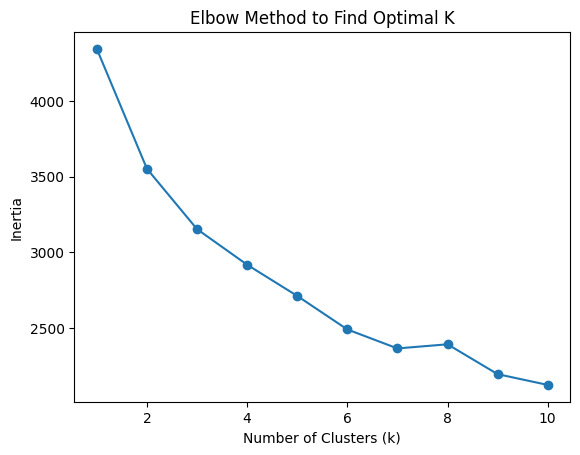

   G3  studytime  goout  freetime  Cluster
0   6          2      4         3        1
1   6          2      3         3        1
2  10          2      2         3        1
3  15          3      2         2        0
4  10          2      2         3        1

Cluster counts:
 Cluster
0    199
1    176
2     20
Name: count, dtype: int64


In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# ---------------------- Load Dataset ----------------------
df = pd.read_csv("student-mat.csv", sep=";")
# df = pd.read_csv("student-por.csv", sep=";")

# ---------------------- Encode Categorical Columns ----------------------
label = LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
    df[col] = label.fit_transform(df[col])

# ---------------------- Select Features for Clustering ----------------------
# Choose behavior/interest features (you can customize)
features = [
    "studytime", "goout", "freetime", "absences", 
    "traveltime", "failures", "internet", "higher",
    "G1", "G2", "G3"
]

X = df[features]

# ---------------------- Normalize Numerical Data ----------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------- Find Optimal K (Elbow Method) ----------------------
inertia = []
K = range(1, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method to Find Optimal K")
plt.show()

# ---------------------- Apply KMeans (Choose k=3) ----------------------
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

print(df[["G3", "studytime", "goout", "freetime", "Cluster"]].head())
print("\nCluster counts:\n", df["Cluster"].value_counts())


Recommend Materials for ANY Student

In [23]:
def recommend_materials(cluster_id):
    if cluster_id == 0:
        return ["Beginner Videos", "Basic Reading Material", "Interactive Tutorials"]
    elif cluster_id == 1:
        return ["Practice Quizzes", "Revision Notes", "Medium Difficulty Exercises"]
    elif cluster_id == 2:
        return ["Advanced Level Problems", "Challenge Assignments", "Project Work"]
    else:
        return ["General Learning Resources"]

# Example: Recommend for a random student
student_cluster = df.iloc[10]["Cluster"]
print("Student Cluster:", student_cluster)
print("Recommended Materials:", recommend_materials(student_cluster))


Student Cluster: 1
Recommended Materials: ['Practice Quizzes', 'Revision Notes', 'Medium Difficulty Exercises']


Collaborating Filtering : Recommend learing materials based on user similarity

In [24]:
import pandas as pd
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split

# --------------------- Load Interaction Data ---------------------
# Example structure: student_id, material_id, rating
df = pd.read_csv("student_material_ratings.csv")

# --------------------- Prepare Data For Surprise ---------------------
reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(df[["student_id", "material_id", "rating"]], reader)

# Split into train-test
trainset, testset = train_test_split(data, test_size=0.20, random_state=42)

# --------------------- User-Based Collaborative Filtering ---------------------
sim_options = {
    "name": "cosine",
    "user_based": True   # User-based similarity
}

algo = KNNBasic(sim_options=sim_options)
algo.fit(trainset)

# --------------------- Function: Recommend Materials ---------------------
def recommend_materials(user_id, df, algo, top_n=5):
    # All materials
    all_materials = df["material_id"].unique()
    
    # Materials already rated by the user
    rated = df[df["student_id"] == user_id]["material_id"].unique()
    
    # Filter out rated materials
    materials_to_predict = [m for m in all_materials if m not in rated]
    
    predictions = []
    for material in materials_to_predict:
        pred = algo.predict(user_id, material)
        predictions.append((material, pred.est))
    
    # Sort by highest predicted rating
    predictions.sort(key=lambda x: x[1], reverse=True)
    
    return predictions[:top_n]

# --------------------- Example: Recommend for User 5 ---------------------
recommendations = recommend_materials(5, df, algo, top_n=5)

print("Recommended materials for user 5:")
for material, score in recommendations:
    print(f"Material {material} | Predicted Rating: {score:.2f}")


Computing the cosine similarity matrix...
Done computing similarity matrix.
Recommended materials for user 5:


Random forest regression : Predict final grade of test score

In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# ---------------------- Load Dataset ----------------------
df = pd.read_csv("student-mat.csv", sep=";")
# df = pd.read_csv("student-por.csv", sep=";")

# ---------------------- Encode Categorical Columns ----------------------
label = LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
    df[col] = label.fit_transform(df[col])

# ---------------------- Features & Target ----------------------
X = df.drop("G3", axis=1)
y = df["G3"]

# ---------------------- Train-Test Split (80/20) ----------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ---------------------- Normalize Numerical Features ----------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---------------------- Random Forest Regression Model ----------------------
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

model.fit(X_train, y_train)

# ---------------------- Predict ----------------------
y_pred = model.predict(X_test)

# ---------------------- Evaluation ----------------------
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regression Results")
print("--------------------------------")
print("MAE (Mean Absolute Error):", mae)
print("MSE (Mean Squared Error):", mse)
print("RMSE (Root Mean Squared Error):", rmse)
print("R2 Score:", r2)


Random Forest Regression Results
--------------------------------
MAE (Mean Absolute Error): 1.1272216122551906
MSE (Mean Squared Error): 3.6639688139282844
RMSE (Root Mean Squared Error): 1.9141496320633569
R2 Score: 0.8213138079601287


Model Evalution

Compare model preformance using metrics like accuracy, RMSE, and silhouette score

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score,
    mean_squared_error,
    silhouette_score,
    classification_report
)

# ----------------------------------------------------
# Load dataset
# ----------------------------------------------------
df = pd.read_csv("student-mat.csv", sep=";")
# df = pd.read_csv("student-por.csv", sep=";")

# ----------------------------------------------------
# Encode categorical variables
# ----------------------------------------------------
label = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label.fit_transform(df[col])

# ----------------------------------------------------
# 1. Decision Tree Classifier – Accuracy Score
# ----------------------------------------------------
# Convert G3 to performance categories
def performance_label(g):
    if g >= 15:
        return "Excellent"
    elif g >= 10:
        return "Average"
    else:
        return "Needs Improvement"

df["Performance"] = df["G3"].apply(performance_label)

X_cls = df.drop(["G3", "Performance"], axis=1)
y_cls = df["Performance"]

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.20, random_state=42
)

clf = DecisionTreeClassifier(max_depth=5, criterion="entropy", random_state=42)
clf.fit(X_train_cls, y_train_cls)
y_pred_cls = clf.predict(X_test_cls)

accuracy = accuracy_score(y_test_cls, y_pred_cls)

# ----------------------------------------------------
# 2. Random Forest Regression – RMSE
# ----------------------------------------------------
X_reg = df.drop(["G3", "Performance"], axis=1)
y_reg = df["G3"]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.20, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reg)
X_test_scaled = scaler.transform(X_test_reg)

reg = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
reg.fit(X_train_scaled, y_train_reg)
y_pred_reg = reg.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))

# ----------------------------------------------------
# 3. K-Means – Silhouette Score
# ----------------------------------------------------
cluster_features = ["studytime", "goout", "freetime", "absences", "traveltime", "G1", "G2", "G3"]
X_cluster = df[cluster_features]

scaler2 = StandardScaler()
X_cluster_scaled = scaler2.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_cluster_scaled)

sil_score = silhouette_score(X_cluster_scaled, cluster_labels)

# ----------------------------------------------------
# Print All Comparative Metrics
# ----------------------------------------------------
print("\n================ MODEL PERFORMANCE COMPARISON ================\n")
print(f"Decision Tree Classifier Accuracy: {accuracy:.4f}")
print(f"Random Forest Regression RMSE: {rmse:.4f}")
print(f"K-Means Clustering Silhouette Score: {sil_score:.4f}")
print("\n==============================================================\n")



================ MODEL PERFORMANCE COMPARISON ================

Decision Tree Classifier Accuracy: 0.8608
Random Forest Regression RMSE: 1.9141
K-Means Clustering Silhouette Score: 0.1612




Performance cross - validation for better generalization

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, make_scorer, mean_squared_error

# ----------------------------------------------------
# Load Dataset
# ----------------------------------------------------
df = pd.read_csv("student-mat.csv", sep=";")
# df = pd.read_csv("student-por.csv", sep=";")

# Encode categorical columns
label = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label.fit_transform(df[col])

# ----------------------------------------------------
# K-Fold Setup
# ----------------------------------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# ====================================================
# 1. Decision Tree Cross-Validation (Accuracy)
# ====================================================
def performance_label(g):
    if g >= 15:
        return "Excellent"
    elif g >= 10:
        return "Average"
    else:
        return "Needs Improvement"

df["Performance"] = df["G3"].apply(performance_label)

X_cls = df.drop(["G3", "Performance"], axis=1)
y_cls = df["Performance"]

decision_tree = DecisionTreeClassifier(max_depth=5, criterion="entropy", random_state=42)

accuracy_cv = cross_val_score(decision_tree, X_cls, y_cls, cv=kf, scoring='accuracy')

# ====================================================
# 2. Random Forest Regression Cross-Validation (RMSE)
# ====================================================
X_reg = df.drop(["G3", "Performance"], axis=1)
y_reg = df["G3"]

scaler = StandardScaler()
X_reg_scaled = scaler.fit_transform(X_reg)

rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)

# Negative MSE used internally — convert to RMSE
mse_cv = cross_val_score(rf, X_reg_scaled, y_reg, cv=kf, scoring='neg_mean_squared_error')
rmse_cv = np.sqrt(-mse_cv)

# ====================================================
# 3. K-Means Cross-Validation (Silhouette Score)
# ====================================================
cluster_features = ["studytime", "goout", "freetime", "absences", "traveltime", "G1", "G2", "G3"]
X_cluster = df[cluster_features]

scaler2 = StandardScaler()
X_cluster_scaled = scaler2.fit_transform(X_cluster)

sil_scores = []

for train_idx, test_idx in kf.split(X_cluster_scaled):
    X_fold = X_cluster_scaled[train_idx]

    kmeans = KMeans(n_clusters=3, random_state=42)
    labels = kmeans.fit_predict(X_fold)

    sil = silhouette_score(X_fold, labels)
    sil_scores.append(sil)

# ====================================================
# Print Cross-Validation Results
# ====================================================
print("\n================ CROSS-VALIDATION RESULTS ================\n")

print(f"Decision Tree Accuracy (5-Fold): {accuracy_cv.mean():.4f}")
print(f"Random Forest RMSE (5-Fold): {rmse_cv.mean():.4f}")
print(f"K-Means Silhouette Score (5-Fold): {np.mean(sil_scores):.4f}")

print("\n==========================================================\n")



================ CROSS-VALIDATION RESULTS ================

Decision Tree Accuracy (5-Fold): 0.8810
Random Forest RMSE (5-Fold): 1.5820
K-Means Silhouette Score (5-Fold): 0.1610


